- 02_Data.csv 데이터로 아래의 과제를 수행하고자 한다.
## 1. 
데이터를 df1으로 선언하고, 데이터의 구조와 타입을 확인


In [10]:
import pandas as pd
df1=pd.read_csv("C:/Users/sshyu/OneDrive/바탕 화면/DSA_13기/02_Data.csv",encoding='cp949')
df1.head()

,Unnamed: 0,날짜,상품명,바코드,발주가능상태,입고수량,카테고리,출고수량
0,0,2019-05-16,V2_0,8.801047e+12,발주가능,384,세탁세제,72
1,1,2019-05-16,V2_3,8.801047e+12,발주가능,207,세탁세제,5
2,2,2019-05-16,V2_7,8.801047e+12,발주가능,520,헤어케어,19
3,3,2019-05-16,V2_11,8.801047e+12,발주가능,0,세탁세제,5
4,4,2019-05-16,V2_14,8.801046e+12,발주가능,96,세탁세제,1


In [12]:
df1.info()
# 데이터의 구조와 타입을 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  15000 non-null  int64  
 1   날짜          15000 non-null  object 
 2   상품명         15000 non-null  object 
 3   바코드         14992 non-null  float64
 4   발주가능상태      15000 non-null  object 
 5   입고수량        15000 non-null  int64  
 6   카테고리        15000 non-null  object 
 7   출고수량        15000 non-null  int64  
dtypes: float64(1), int64(3), object(4)
memory usage: 937.6+ KB


## 2. 
'카테고리'항목 중 '세탁세제'의 '출고수량'이 높은 100개 데이터를 추출해 result7.xlsx으
로 저장

In [20]:
df1[df1['카테고리']=='세탁세제'].sort_values(by=['출고수량'],ascending=False)[:100]

,Unnamed: 0,날짜,상품명,바코드,발주가능상태,입고수량,카테고리,출고수량
3647,3647,2019-06-03,V2_86,1.880105e+13,발주가능,9777,세탁세제,308
9091,9091,2019-07-01,V2_86,1.880105e+13,발주가능,0,세탁세제,305
12175,12175,2019-07-16,V2_86,1.880105e+13,발주가능,6600,세탁세제,273
5005,5005,2019-06-10,V2_86,1.880105e+13,발주가능,0,세탁세제,266
3831,3831,2019-06-04,V2_86,1.880105e+13,발주가능,0,세탁세제,258
...,...,...,...,...,...,...,...,...
11555,11555,2019-07-13,V2_60,1.880105e+13,발주가능,0,세탁세제,97
14904,14904,2019-08-07,V2_86,1.880105e+13,발주가능,0,세탁세제,95
14634,14634,2019-08-05,V2_61,1.880105e+13,발주가능,0,세탁세제,95
14159,14159,2019-08-01,V2_87,1.880105e+13,발주가능,850,세탁세제,94


## 3. 
'카테고리'별 '출고수량'과 '입고수량'의 합/ 평균 / 표준편차를 요약 계산하시오.

In [26]:
df1.groupby('카테고리')[['출고수량','입고수량']].agg(['count','mean','std'])

출고수량                        입고수량                        
      count       mean        std count        mean         std
카테고리                                                           
F&B    1038   5.566474   9.552419  1038   48.363198  232.547487
ST     1732   0.398961   0.958202  1732    5.566397   27.615995
기타      153   4.058824   4.068873   153   34.163399  143.768201
덴탈케어   3115   5.072231  12.516178  3115   67.688283  384.285684
매입브랜드   238   1.176471   1.551627   238   16.638655   55.213163
세탁세제   4265  11.083236  28.648340  4265   60.092145  387.954626
주방세제   1709  10.567583  19.751878  1709  104.768286  473.236422
헤어케어   2750   7.119273  18.570081  2750   57.072000  310.943569

## 4. 
'카테고리'별 '출고수량'의 평균을 plotly 라이브러리로 시각화 하시오

In [130]:
df1.groupby('카테고리')['출고수량'].mean().reset_index()

,카테고리,출고수량
0,F&B,5.566474
1,ST,0.398961
2,기타,4.058824
3,덴탈케어,5.072231
4,매입브랜드,1.176471
5,세탁세제,11.083236
6,주방세제,10.567583
7,헤어케어,7.119273


In [303]:
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.io as pio
# Jupyter 환경에서 Plotly 그래프를 인라인으로 출력하도록 설정
pio.renderers.default = 'notebook_connected'
df1_4=df1.groupby('카테고리')['출고수량'].mean().reset_index()
fig=px.bar(df1_4,x='카테고리',y='출고수량')
fig.write_html('plot.html')

## 5. 
카테고리'에서 '헤어케어'와 '세탁세제'제품의 '출고수량'의 평균의 차이를 계산하시오.

In [285]:
import numpy as np
df1_5=df1[df1['카테고리']=='헤어케어']['출고수량'].mean()-df1[df1['카테고리']=='세탁세제']['출고수량'].mean()
# 차이는 절댓값이니 np.abs함수를 이용
# round 함수를 통해 소숫점 아래 넷째자리에서 반올림
# item 함수를 통해 값만 출력
np.abs(round(df1_5,4)).item()

3.964

## 6. 
출고수량'의 분포를 Boxplot으로 시각화 하고(Seaborn) image2.png로 저장하시오.

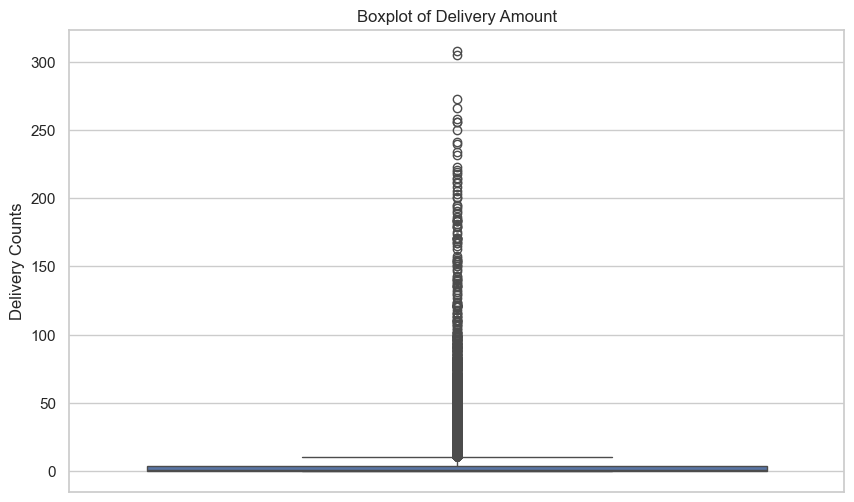

In [173]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# 출고수량의 분포를 boxplot으로 시각화
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.boxplot(y=df1['출고수량'],native_scale=True)
plt.title('Boxplot of Delivery Amount')
plt.ylabel('Delivery Counts')
# 이미지 파일 저장
plt.savefig('C:/Users/sshyu/OneDrive/바탕 화면/DSA_13기/image2.png', dpi=300, bbox_inches='tight')
plt.show()

## 7. 
'카테고리'에서 '헤어케어' 제품 중, '입고수량'이 높은 상위 50개 데이터를 추출하여 df2로
선언한 뒤, 상품명' 빈도수가 가장높은 3개 제품을 확인하고, 빈도수에 대한 그래프를 시각화
하시오.

In [174]:
# 카테고리에서 헤어케어 제품 중, 입고수량이 높은 상위 50개 데이터 추출
df2=df1[df1['카테고리']=='헤어케어'].sort_values(by=['입고수량'],ascending=False)[:50]

In [175]:
# 상품명 빈도수가 가장 높은 3개 제품 확인
df2['상품명'].value_counts().sort_values(ascending=False)[:3]

상품명
V2_6     9
V2_84    8
V2_85    6
Name: count, dtype: int64

In [186]:
# 또 다른 방법
# value_counts 함수 실행 시 내림차순으로 나오므로
# head 함수를 통해 빈도수가 가장 높은 3개 제품 확인
df2['상품명'].value_counts().head(3)

상품명
V2_6     9
V2_84    8
V2_85    6
Name: count, dtype: int64

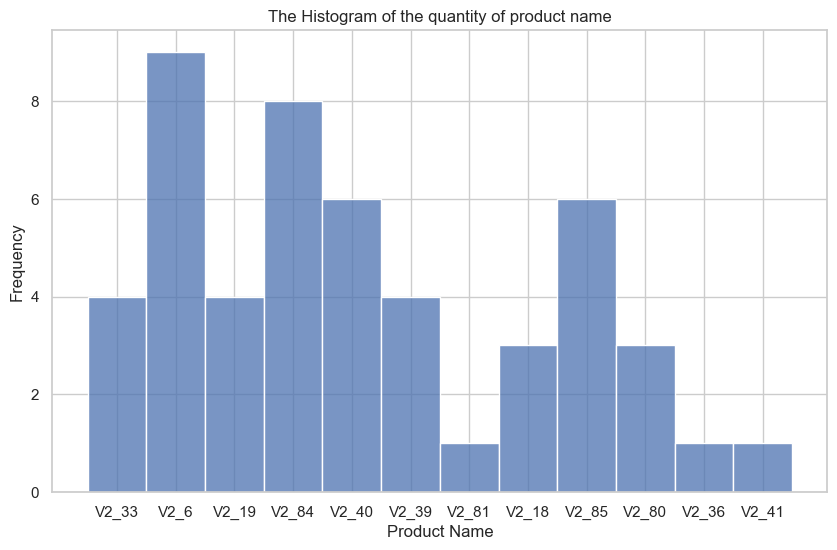

In [183]:
# 빈도수에 대한 그래프 시각화
plt.figure(figsize=(10,6))
sns.histplot(df2['상품명'],bins=30)
plt.xlabel('Product Name')
plt.ylabel('Frequency')
plt.title('The Histogram of the quantity of product name')
plt.show()

## 8. 
'카테고리'내 특정 항목을 입력하면, 해당 카테고리의 '상품명' 별 '출고수량'의 평균을 계
산하여 파일형태로 저장하고, 출고수량의 histogram을 시각화 하는 함수를 구성하시오.
(input 함수 활용)

In [286]:
def myfunc_pro8():
    # 사용자에게 카테고래 내 특정 항목 입력 받기
    ans=input('카테고리 내 특정항목을 입력해주세요:')
    # 해당 카테고리의 상품명 별 출고수량의 평균을 계산
    new_df=df1[df1['카테고리']==ans].groupby('상품명')['출고수량'].mean()
    # 이를 파일 형태로 저장
    new_df.to_csv("C:/Users/sshyu/OneDrive/바탕 화면/DSA_13기/df1_byuser.csv",encoding='cp949')
    # 이때 두번째 칼럼 명칭 '출고수량 평균'
    # histogram으로 시각화 히기
    plt.figure(figsize=(10,6))
    sns.histplot(new_df)
    plt.xlabel('Product Name')
    plt.ylabel('Mean of Delivery Quantity')
    plt.show()

카테고리 내 특정항목을 입력해주세요: 세탁세제


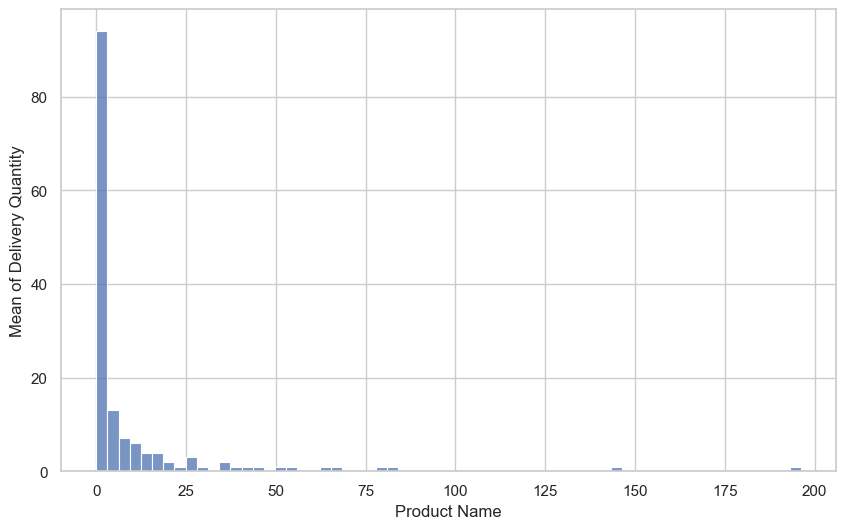

In [206]:
myfunc_pro8()

- 03_Data.xlsx데이터를 불러와, 데이터를 재구조화 한 뒤,df3로 선언하여, 아래와 같은 분
석을 실시하고자 한다.


## 9. 
df3 연속형 자료의 기술 통계량을 확인 

In [70]:
# 데이터의 재구조화
df2 = pd.read_excel("C:/Users/sshyu/OneDrive/바탕 화면/DSA_13기/03_Data.xlsx", skiprows=1)
df2.columns

Index([                   '구분',                 '카테고리명',
                        '자재그룹',                 '자재그룹명',
                         '제품명',                    '단위',
                          '판매',     2019-12-01 00:00:00,
           2020-10-01 00:00:00,     2020-11-01 00:00:00,
           2020-12-01 00:00:00, '2019-12-01 00:00:00.1',
       '2020-10-01 00:00:00.1', '2020-11-01 00:00:00.1',
       '2020-12-01 00:00:00.1', '2019-12-01 00:00:00.2',
       '2020-10-01 00:00:00.2', '2020-11-01 00:00:00.2',
       '2020-12-01 00:00:00.2', '2019-12-01 00:00:00.3',
       '2020-10-01 00:00:00.3', '2020-11-01 00:00:00.3',
       '2020-12-01 00:00:00.3',                  '안전재고',
                         ' 분류'],
      dtype='object')

In [72]:
df2_1 = df2.melt(id_vars= [ '구분','카테고리명','자재그룹','자재그룹명','제품명','단위','판매','안전재고',' 분류'] )
df3 = df2_1.rename(columns={'variable':'공급일자','value':'매출액',' 분류':'분류'})
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640 entries, 0 to 639
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   구분      640 non-null    object 
 1   카테고리명   640 non-null    object 
 2   자재그룹    640 non-null    int64  
 3   자재그룹명   640 non-null    object 
 4   제품명     640 non-null    object 
 5   단위      640 non-null    object 
 6   판매      640 non-null    float64
 7   안전재고    640 non-null    float64
 8   분류      640 non-null    object 
 9   공급일자    640 non-null    object 
 10  매출액     640 non-null    float64
dtypes: float64(3), int64(1), object(7)
memory usage: 55.1+ KB


In [74]:
# df3의 기술통계량 확인
df3.describe()

,자재그룹,판매,안전재고,매출액
count,640.0,640.000000,640.000000,640.000000
mean,1687.0,14025.460000,2162.180000,4427.560781
std,0.0,40176.636238,9467.402429,11714.434732
min,1687.0,0.000000,0.000000,0.000000
25%,1687.0,0.000000,0.000000,0.000000
50%,1687.0,438.150000,0.000000,0.000000
75%,1687.0,9258.275000,0.000000,492.425000
max,1687.0,234603.900000,46893.900000,84967.200000


In [75]:
df3.head()

,구분,카테고리명,자재그룹,자재그룹명,제품명,단위,판매,안전재고,분류,공급일자,매출액
0,구분,CHB,1687,친환경 바디워시,A,천원,0.0,0.0,E,2019-12-01 00:00:00,0.0
1,구분,CHB,1687,친환경 바디워시,B,천원,0.0,0.0,E,2019-12-01 00:00:00,0.0
2,구분,CHB,1687,친환경 바디워시,C,천원,10354.1,0.0,A,2019-12-01 00:00:00,9474.3
3,구분,CHB,1687,친환경 바디워시,D,천원,3543.3,0.0,A,2019-12-01 00:00:00,7702.6
4,구분,CHB,1687,친환경 바디워시,E,천원,234603.9,39593.3,A,2019-12-01 00:00:00,56309.6


## 10. 
'분류'에서 'A'에 해당하는 제품을 뽑아 '매출액'의 평균과 중앙값의 차이를 계산

In [221]:
import numpy as np
# 차이를 계산
# 이때 차이는 절댓값이니 abs 함수를 사용
# 이때 df3.loc[df3['분류']=='A','매출액'] 코드도 가능
np.abs(df3[df3['분류']=='A']['매출액'].median()-df3[df3['분류']=='A']['매출액'].mean()).item()

10151.6875

**추가적인 데이터 분석**
매출액의 평균과 중앙값이 차이가 많이 나는 이유

Text(0, 0.5, 'Amount')

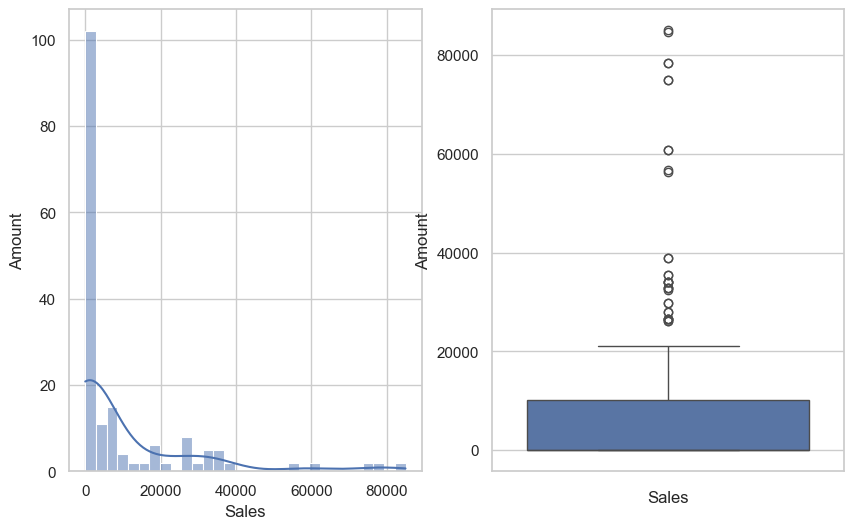

<Figure size 500x600 with 0 Axes>

<Figure size 500x600 with 0 Axes>

In [239]:
df3_10=df3.loc[df3['분류']=='A','매출액'].reset_index(drop=True)
fig,ax=plt.subplots(1,2,figsize=(10,6))
# 매출액의 히스토그램 그리기
plt.figure(figsize=(5,6))
sns.histplot(df3_10,kde=True,ax=ax[0],bins=30)
ax[0].set_xlabel('Sales')
ax[0].set_ylabel('Amount')

# 매출액의 박스플랏 그리기
plt.figure(figsize=(5,6))
sns.boxplot(df3_10,ax=ax[1])
ax[1].set_xlabel('Sales')
ax[1].set_ylabel('Amount')

In [243]:
# 왜도와 첨도 분석
# 정규분포의 왜도와 첨도 값은 0에 가까움
from scipy.stats import skew, kurtosis
print(skew(df3_10))
print(kurtosis(df3_10))

2.323451871052623
5.207333033989476


**결론** 왜도, 첨도의 값과 그래프를 보았을 때 쪽으로 긴 꼬리를 가지므로 데이터가 정규분포에 가까운 형태라고 보기 어려움. 따라서 위와 같이 평균과 중앙값이 큰 차이를 가진다는 것을 알 수 있음.

## 11. 
'매출액'이 높은 상위 100개 항목을 뽑아, df3_100으로 선언한 뒤, '제품명'의 빈도수를
확인 하시오.

In [250]:
# 매출액이 높은 상위 100개 항목을 뽑아 데이터 선언하기
df3_100=df3.sort_values(by=['매출액'],ascending=False)[:100].reset_index(drop=True)

In [251]:
# 제품명의 빈도수 확인
df3_100['제품명'].value_counts().reset_index()

,제품명,count
0,E,8
1,H,8
2,FF3,8
3,A2,8
4,J,8
5,G,8
6,I,6
7,K,6
8,KC2,6
9,B3,6


**추가적인 데이터 분석** 시각화까지 해보기

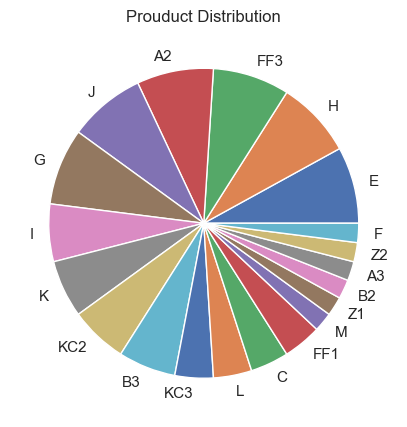

In [257]:
plt.figure(figsize=(5,6))
plt.pie(df3_100['제품명'].value_counts(),
       labels=df3_100['제품명'].value_counts().index)
plt.title('Prouduct Distribution')
plt.show()

## 12. 
df3에 '공급일자'데이터를 이용하여, '공급연도'라는 연도 데이터를 따로 추출


In [264]:
# 공급일자 데이터를 datetime형식으로 반환
df3['공급일자']=pd.to_datetime(df3['공급일자'])
# 공급연도 칼럼으로 추출
df3['공급연도']=df3['공급일자'].dt.year
df3['공급연도'].head()

0    2019
1    2019
2    2019
3    2019
4    2019
Name: 공급연도, dtype: int32

## 13. 
'분류'에 따른 '매출액' 합의 2019년도 대비 2020의 증감률 계산


In [277]:
# 분류와 공급 연도에 따른 매출액 확인
# 이때 unstack 함수를 통해 첫번째 레벨의 인덱스를 컬럼으로 사용
df3_rate=df3.groupby(['분류','공급연도'])['매출액'].sum().unstack(1)
# 증감률 계산
df3_rate['증감률']=(df3_rate[2020]-df3_rate[2019])/df3_rate[2019]
df3_rate

공급연도,2019,2020,증감률
분류,,,
A,356379.4,1448912.0,3.065645
B,20564.1,120.0,-0.994165
E,27600.5,25506.2,-0.075879
F,19498.5,113960.6,4.844583
G,1039.0,25810.2,23.841386
H,0.0,52900.4,inf
K,88588.6,105500.9,0.190908
L,0.0,107632.8,inf
M,143063.8,296561.9,1.072935


## 14. 
Pandas의 quantile함수를 활용해서, '매출액'이 상위 75%이상인 데이터를 A / 미만인 데
이터를 B로 선언하여, '판매구분'이라는 변수로 선언


In [279]:
# 매출액 상위 75% 를 기준으로 판매구분 변수 설정
stand=df3['매출액'].quantile(q=0.75)
print('* 판매구분 기준(매출액 상위 75%):', stand , '*' )
# 기준 이상인 데이터를 A, 미만인 데이터를 B로 선언
df3['판매구분'] = df3['매출액'].apply(lambda x: 'A' if x >= stand else 'B')
df3.head()

* 판매구분 기준(매출액 상위 75%): 492.42499999999995 *


,구분,카테고리명,자재그룹,자재그룹명,제품명,단위,판매,안전재고,분류,공급일자,매출액,공급연도,판매구분
0,구분,CHB,1687,친환경 바디워시,A,천원,0.0,0.0,E,2019-12-01,0.0,2019,B
1,구분,CHB,1687,친환경 바디워시,B,천원,0.0,0.0,E,2019-12-01,0.0,2019,B
2,구분,CHB,1687,친환경 바디워시,C,천원,10354.1,0.0,A,2019-12-01,9474.3,2019,A
3,구분,CHB,1687,친환경 바디워시,D,천원,3543.3,0.0,A,2019-12-01,7702.6,2019,A
4,구분,CHB,1687,친환경 바디워시,E,천원,234603.9,39593.3,A,2019-12-01,56309.6,2019,A


## 15. 
'판매구분'에 따른 '매출액'의 '평균'/'표준편차'를 계산 하시오.

In [280]:
df3.groupby('판매구분')['매출액'].agg(['mean','std'])

,mean,std
판매구분,,
A,17652.750625,17799.249363
B,19.164167,67.216824
